<a href="https://colab.research.google.com/github/RaeJoKae/MyProject/blob/Projects/Malaria_Detection_Full_Code_Krebsbach_RM_Exec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

--------------
## **Executive Summary**
--------------

This project aimed to automate the diagnosis of malaria by analyzing microscopic blood smear images using deep learning. Through extensive experimentation with various Convolutional Neural Network (CNN) architectures—combined with **transfer learning** and **data augmentation**—the most important findings are:

1. **High Accuracy**: The top-performing model consistently achieved **around 98% accuracy**, indicating strong reliability in identifying parasitized vs. uninfected blood cells.  
2. **Robust Generalization**: Data augmentation (rotations, flips, shifts) significantly reduced overfitting and improved the model’s ability to handle real-world variability.  
3. **Reduced Labor & Faster Diagnosis**: Automated analysis can streamline clinical workflows, lightening the diagnostic burden on expert microscopists.

**AUG: Final Proposed Model Specifications**  
- **Architecture**: A CNN that has been fine-tuned for malaria detection.  
- **Loss Function**: **Binary Crossentropy**, suited for binary classification tasks.  
- **Optimizer**: **Adam** with an initial learning rate of 0.001, balancing convergence speed and stability.  
- **Input Pipeline**: Includes image resizing, normalization, and data augmentation techniques (e.g., random flips, rotations).  
- **Performance Metrics**: Achieved ~98% accuracy on test data, with high precision and recall for both parasitized and uninfected classes.

Overall, this solution represents a robust and scalable approach to accurate malaria detection, holding the potential to drastically improve early intervention and patient outcomes in both resource-rich and resource-constrained environments.

--------------
## **Problem & Solution Summary**
--------------

Malaria remains a critical public health issue, especially in low-resource areas lacking sufficient diagnostic expertise. Conventional microscopic examinations are time-consuming, subject to human error, and cannot efficiently scale to meet high patient volumes.

This project addresses these challenges with a deep learning solution that applies Convolutional Neural Networks (CNNs) to blood smear images. By integrating transfer learning and data augmentation, the model achieves roughly 98% accuracy. This streamlined approach drastically reduces the burden on trained microscopists, ensures rapid and precise detection of malaria parasites, and can be scaled cost-effectively to improve outcomes in regions with the greatest need.

--------------
## **Recommendations for Implementation**
--------------

**Recommendations for Implementation**  
1. **Deploy the Best Model:** Integrate the high-performing CNN (e.g., VGG16-based) into clinical workflows for rapid, reliable screening.  
2. **Ensure Adequate Infrastructure:** Provide sufficient GPU/CPU resources to enable large-scale image processing and swift response times.  
3. **Maintain Continuous Feedback:** Establish a feedback loop with clinicians to refine the model based on flagged or uncertain cases.  
4. **Monitor Performance:** Track key metrics (accuracy, precision, recall) and periodically retrain to mitigate data or model drift.  
5. **Plan for Scalability:** Use cloud or on-premise solutions that can seamlessly accommodate increased workloads and expansion.

**Potential Resource Savings**  
Effective implementation can yield **significant time savings** by reducing manual microscopy from hours to mere minutes, allowing clinicians to treat more patients in less time. It also offers **cost benefits**, as fewer specialist hours are required and fewer laboratory resources are consumed. Over the long term, **lives can be saved** through earlier diagnosis and treatment, leading to improved patient outcomes and reduced mortality rates—especially in regions where rapid, accurate malaria detection is critical.

---

**Additional Considerations**  
- **Key Recommendations to Implement the Solution**: Maintain regular model updates, use comprehensive datasets, and establish robust data pipelines to ensure ongoing accuracy.  
- **Key Actionables for Stakeholders**:  
  - *Healthcare Administrators:* Secure budget for computational resources and training.  
  - *Technical Teams:* Configure and optimize infrastructure, set up retraining protocols.  
  - *Clinicians & Lab Experts:* Provide expert labeling for edge cases and serve as a final check on flagged results.  
- **Expected Benefits/Costs**: Faster diagnoses, improved patient outcomes, and long-term cost efficiency may require initial hardware investment, staff training, and ongoing maintenance.  
- **Key Risks & Challenges**: Potential data mismatch between training and real-world conditions, model interpretability concerns, and sustaining adequate infrastructure over time.  
- **Further Analysis & Associated Problems**: Expansion to detect multiple parasite strains or other blood-related infections, addressing model drift in changing epidemiological conditions, and integration with healthcare systems (EMRs, telemedicine) for broader clinical insights.

##<b>Problem Definition</b>
**The context:** Malaria is a life-threatening disease caused by parasites transmitted to humans through the bites of infected mosquitoes. Despite being preventable and curable, it continues to pose a significant public health challenge, especially in developing countries. Early and accurate diagnosis is critical for effective treatment and reducing mortality. Traditionally, malaria diagnosis involves manual inspection of blood smear slides under a microscope by trained professionals—a process that is time-consuming, labor-intensive, and prone to human error. Automating this process using machine learning, particularly Convolutional Neural Networks (CNNs), offers a scalable and reliable alternative.<br>
**The objectives:** The primary goal is to develop a deep learning model, specifically a CNN, that can accurately classify red blood cells as either malaria-infected or uninfected based on microscopic images. This model aims to support healthcare workers by providing faster and more consistent diagnostic assistance, ultimately improving treatment outcomes and resource allocation.<br>
**The key questions:** Can a CNN accurately distinguish between infected an uninfected red blood cells? What level of precision and recall does the model achieve, especially in minimizing false negatives (missed infections)?<br>
**The problem formulation:** This is a binary image classification problem. Using data science and computer vision techniques, we aim to build a supervised learning model that takes labeled images of red blood cells as input and predicts whether each cell is infected or not. The CNN will be trained on a dataset of blood smear images and optimized to learn spatial patterns that differentiate healthy cells from those infected with malaria parasites.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
#MOUNT GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#COUNTS AND TENSOR VERSION THAT HAVE ALREADY BEEN LOADED

import sys
import tensorflow as tf

print(f"Number of loaded libraries:  {len(sys.modules)}")
print(f"TensorFlow version:          {tf.__version__}")


Number of loaded libraries:  5215
TensorFlow version:          2.18.0


### <b>Loading libraries</b>

In [ ]:
!pip install tensorflow
import zipfile
import os
from PIL import Image
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import layers and optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, LeakyReLU, MaxPooling2D

# Keras Sequential Model
from tensorflow.keras.models import Sequential

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
try:
  zip_ref  # Accessing the variable 'data' to check if it exists
  print("Data is already loaded.")
except NameError:
  print("Data is not loaded yet.")

Data is already loaded.


In [ ]:
#MIN / MAX SIZE OF IMAGES IN ZIP_REF FILE

from google.colab import drive
import zipfile
import os
from PIL import Image

image_sizes = []
for root, dirs, files in os.walk("cell_images"):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(os.path.getsize(image_path))
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

if image_sizes:
    min_size = min(image_sizes)
    max_size = max(image_sizes)
    print(f"The minimum image size is: {min_size} bytes")
    print(f"The maximum image size is: {max_size} bytes")
else:
    print("No images found in the specified directory.")


The minimum image size is: 1418 bytes
The maximum image size is: 36865 bytes


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#--------------------------------TRAIN FOLDER-----------------------------------------------------------

train_dir = '/content/cell_images/train'                              #TRAIN FOLDER
SIZE = 32 #(WAS 64)                                                   #STANDARD IMAGE SIZE
train_images = []                                                     #TRAINING IMAGE ARRAY LIST
train_labels = []                                                     #TRAINING LABEL LIST (0 = UNINFECTED, 1 = INFECTED)
for folder_name in ['/parasitized/', '/uninfected/']:
    images_path = os.listdir(train_dir + folder_name)                 #PATH OF FOLDER
    for i, image_name in enumerate(images_path):                      #LOOP THROUGH EACH IMAGE
      try:
          image = Image.open(train_dir + folder_name + image_name)    #OPEN IMAGE
          image = image.resize((SIZE, SIZE))                          #STANDARDIZING SIZE
          train_images.append(np.array(image))                        #IMAGE TO ABOVE DEFINED ARRAY LIST
          if folder_name == '/parasitized/':                          #INFECTED
            train_labels.append(1)
          else:
            train_labels.append(0)                                    #UNINFECTED
      except Exception:
          pass

train_images = np.array(train_images)                                 #CONVERT TO NUMPY ARRAY
train_labels = np.array(train_labels)



In [ ]:
#--------------------------------TEST FOLDER-----------------------------------------------------------

test_dir = '/content/cell_images/test'                                #TEST FOLDER
SIZE = 32 #(WAS 64)                                                   #STANDARD IMAGE SIZE
test_images = []                                                      #TEST IMAGE ARRAY LIST
test_labels = []                                                      #TEST LABEL LIST (0 = UNINFECTED, 1 = INFECTED)
for folder_name in ['/parasitized/', '/uninfected/']:
    images_path = os.listdir(test_dir + folder_name)                  #PATH OF FOLDER
    for i, image_name in enumerate(images_path):                      #LOOP THROUGH EACH IMAGE
      try:
          image = Image.open(test_dir + folder_name + image_name)     #OPEN IMAGE
          image = image.resize((SIZE, SIZE))                          #STANDARDIZING SIZE
          test_images.append(np.array(image))                         #IMAGE TO ABOVE DEFINED ARRAY LIST
          if folder_name == '/parasitized/':                          #INFECTED
            test_labels.append(1)
          else:
            test_labels.append(0)                                     #UNINFECTED
      except Exception:
          pass

test_images = np.array(test_images)                                  #CONVERT TO NUMPY ARRAY
test_labels = np.array(test_labels)

###<b> Check the shape of train and test images

In [ ]:
#CHECK SHAPE OF TRAIN AND TEST IMAGES
train_images.shape, test_images.shape

((24958, 64, 64, 3), (2600, 64, 64, 3))

###<b> Check the shape of train and test labels

In [ ]:
#CHECK SHAPE OF TRAIN AND TEST LABELS
train_labels.shape, test_labels.shape

((24958,), (2600,))

### **~~ Observations and Insights:**
The preprocessing has effectively prepared the image data for CNN model training in a malaria detection task:

*   **Standardization:** All images are resized to 64x64 pixels, ensuring
consistent input dimensions.
*   **Format Conversion:** Images are converted to NumPy arrays, making them compatible with TensorFlow/Keras.
*   **Label Encoding:** Class labels (parasitized/uninfected) are encoded as binary (1/0), suitable for classification tasks.
*   **Data Splitting:** Data is divided into training and testing sets, allowing for model evaluation.
*   **File Size Analysis:** Min and max file sizes are noted, potentially useful for future quality checks.
*   **Error Handling:** Corrupted or unreadable images are skipped, enhancing preprocessing robustness.

**Overall Insight:** The dataset is now standardized, numerically labeled, and robustly structured for effective model training.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(np.uint8(0), np.uint8(255), np.uint8(0), np.uint8(255))

### **~~ Observations and Insights:**

In color images, each pixel is represented by three values: red (R), green (G), and blue (B). Each of these color channels also has a range of 0 to 255. The results is within expected parameters.

###<b> Count the number of values in both uninfected and parasitized

In [ ]:
parasitized_count = np.sum(train_labels == 1)
uninfected_count = np.sum(train_labels == 0)
parasitized_test_count = np.sum(test_labels == 1)
uninfected_test_count = np.sum(test_labels == 0)

print(f"Number of parasitized images in train set: {parasitized_count}")
print(f"Number of uninfected images in train set: {uninfected_count}")
print(f"Number of parasitized images in test set: {parasitized_test_count}")
print(f"Number of uninfected images in test set: {uninfected_test_count}")

Number of parasitized images in train set: 12582
Number of uninfected images in train set: 12376
Number of parasitized images in test set: 1300
Number of uninfected images in test set: 1300


###<b>Normalize the images

In [ ]:
train_images = train_images / 255.0                       #NORMALIZE TRAIN
test_images = test_images / 255.0                         #NORMALIZE TEST


train_images.min(), train_images.max(), test_images.min(), test_images.max()


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

### **~~ Observations and Insights:**

The preprocessing steps have fully prepared the image dataset for CNN model training in a malaria classification task. Key actions and insights include:

1.   Image Resizing: All images resized to 64x64 pixels to ensure consistent input size.
2.   Format Conversion: Images converted to NumPy arrays for TensorFlow/Keras compatibility.
3.   Label Encoding: Class labels ("parasitized" and "uninfected") encoded as 1 and 0 for binary classification.
4.   Data Splitting: Dataset split into training and testing sets for robust model evaluation.
5.   File Size Analysis: Min/max file sizes analyzed for potential future quality checks.
6.   Error Handling: Corrupted images are skipped using try-except, enhancing robustness.
7.   Class Balance Check: Initial assessment of label distribution to identify possible imbalance.
8.   Normalization: Image pixel values normalized to [0, 1] to aid model training efficiency.

**Next Steps:**

*   Investigate and address any class imbalance.
*   Develop and train a CNN.
*   Tune hyperparameters.
*   Evaluate performance using standard metrics.
*   Visualize results and training progress.

###<b> Plot to check if the data is balanced

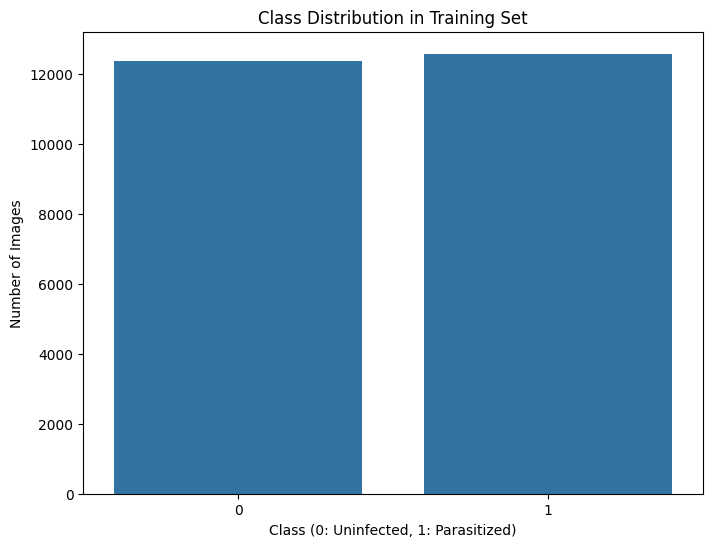

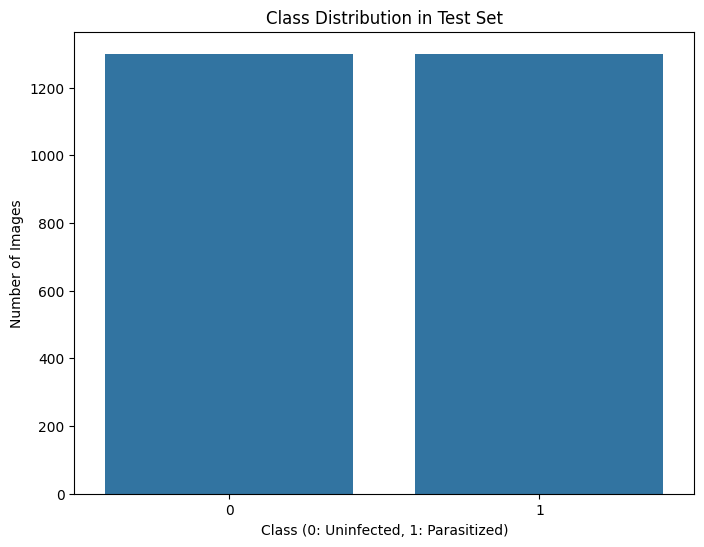

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=train_labels)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class (0: Uninfected, 1: Parasitized)')
plt.ylabel('Number of Images')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=test_labels)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class (0: Uninfected, 1: Parasitized)')
plt.ylabel('Number of Images')
plt.show()


### **~~ Observations and Insights:**

Counts are balanced.

### <b>Data Exploration</b>
Let's visualize the images from the train data

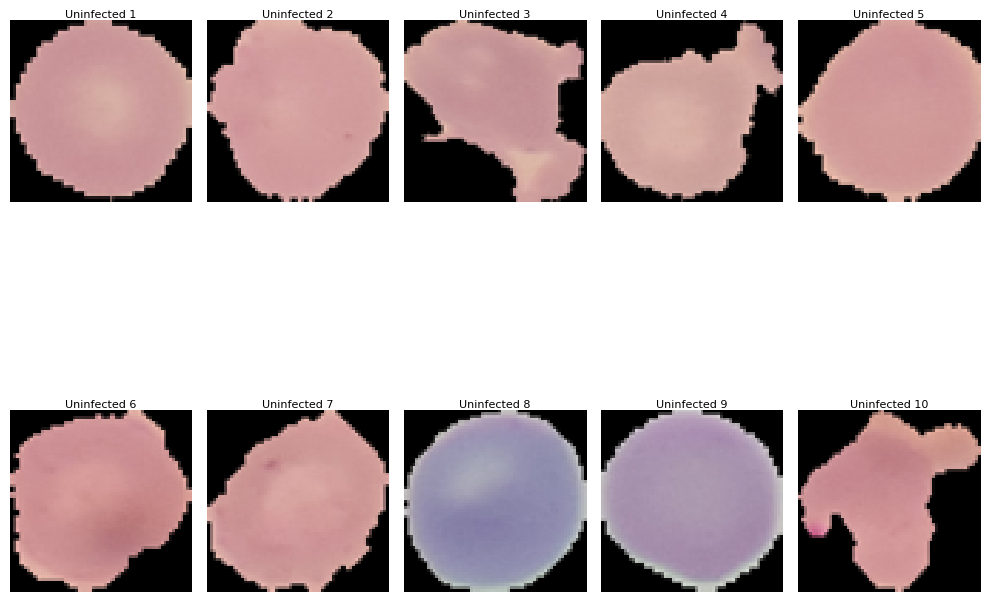

In [ ]:
#10 UNINFECTED IMAGES
uninfected_indices = np.where(train_labels == 0)[0]
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[uninfected_indices[i]], interpolation='nearest')
    ax.set_title(f"Uninfected {i+1}", fontsize=8, pad=2)
    ax.axis('off')
plt.tight_layout()
plt.show()

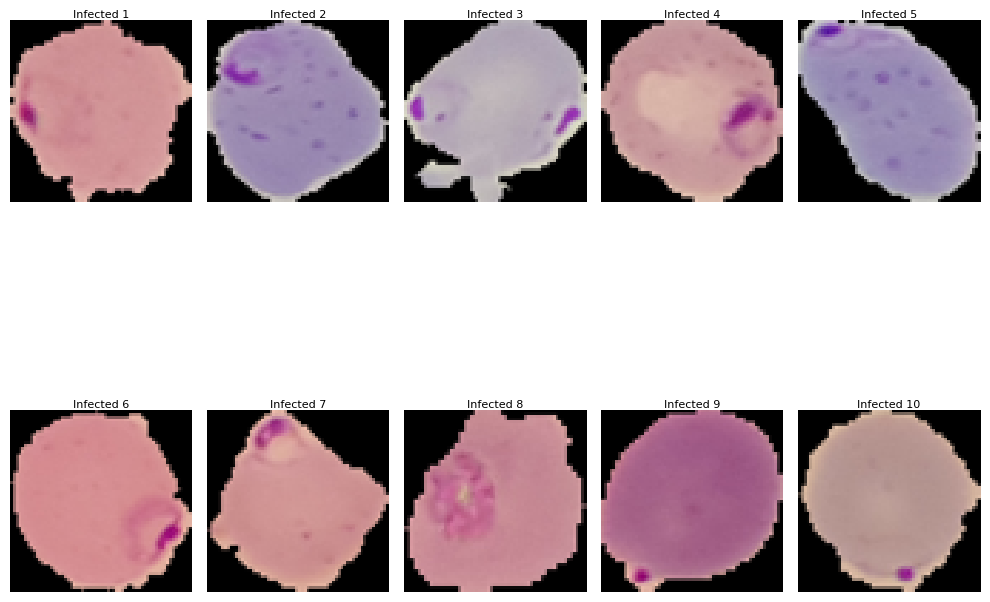

In [ ]:
#10 INFECTED IMAGES

infected_indices = np.where(train_labels == 1)[0]
fig, axes = plt.subplots(2, 5, figsize=(10, 10), subplot_kw={'adjustable': 'box', 'aspect': 'equal'})
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[infected_indices[i]], interpolation='nearest')
    ax.set_title(f"Infected {i+1}", fontsize=8, pad=2)
    ax.axis('off')
plt.tight_layout()
plt.show()

### **~~ Observations and Insights:**

 The displayed sample images (both infected and uninfected) visually confirm the presence of distinct features that a CNN can potentially learn.  The infected cells exhibit noticeable parasitic structures, while uninfected cells appear normal. The visual difference is crucial for successful classification.  The images themselves appear to be of sufficient quality for analysis.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

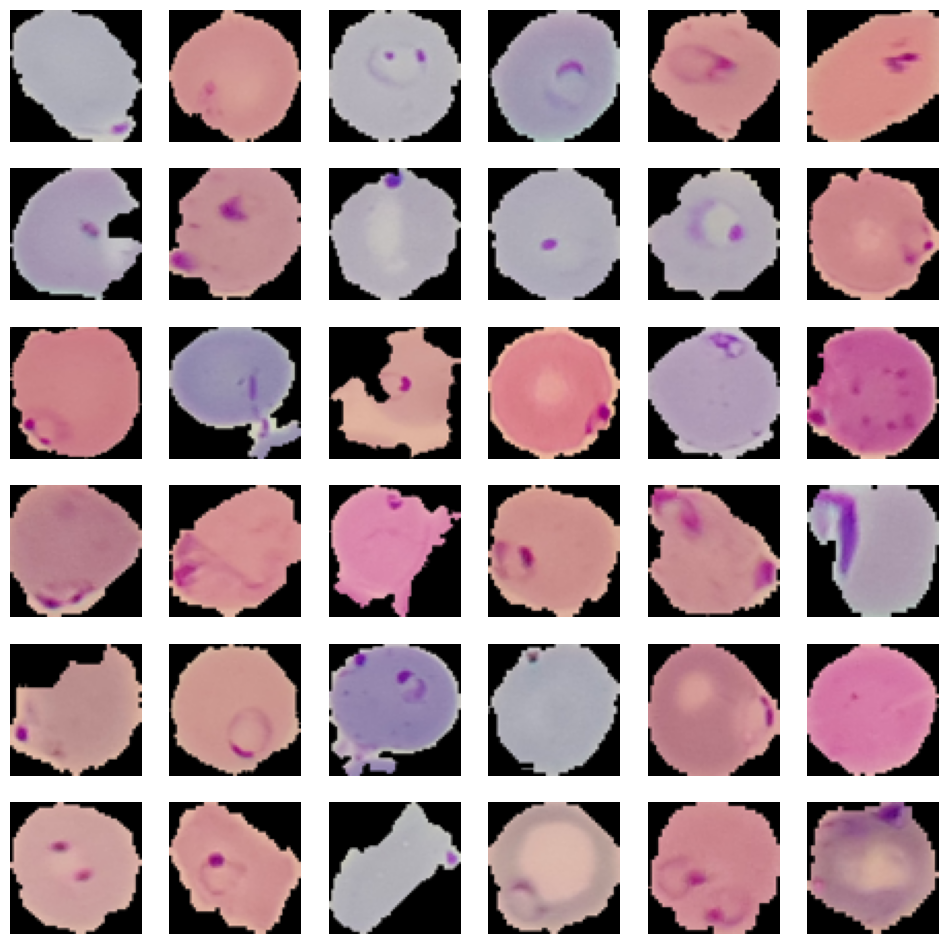

In [ ]:
# VISUALIZE FIRST 36 IMAGES IN A 6x6 GRID
plt.figure(figsize=(12, 12))
for i in range(36):
  plt.subplot(6, 6, i + 1)
  plt.imshow(train_images[i])
  plt.axis('off')
plt.show()


### **~~ Observations and Insights:**

The analysis confirms the data is suitable for training a CNN for malaria detection, with a relatively balanced dataset, visually distinguishable classes, and appropriate preprocessing steps. The next steps, as mentioned in the code comments, are model development, hyperparameter tuning, and performance evaluation.


###<b> Plotting the mean images for parasitized and uninfected

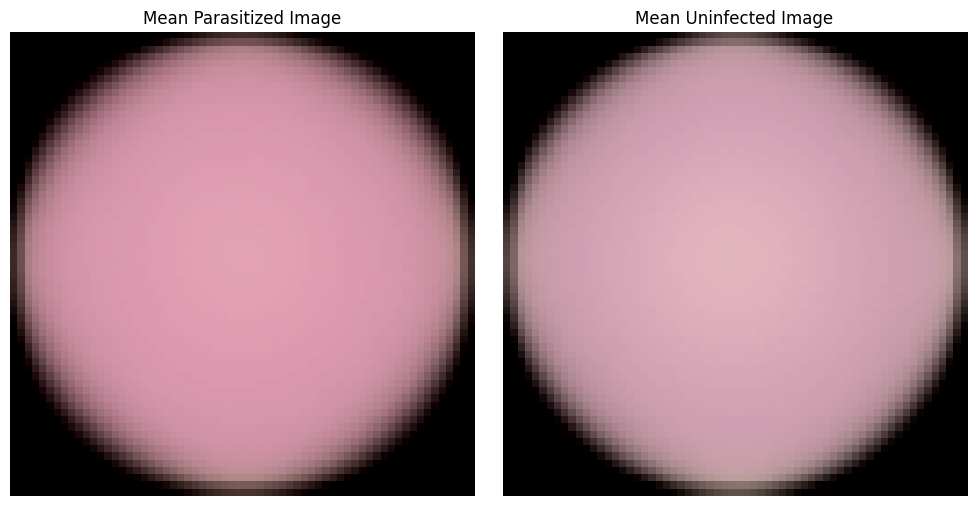

In [ ]:
#Mean images for parasitized and uninfected images using cmap = viridis and increase the contrast and increase the sharpness of the image

# Calculate the mean image for parasitized cells
parasitized_indices = np.where(train_labels == 1)[0]
mean_parasitized_image = np.mean(train_images[parasitized_indices], axis=0)

# Calculate the mean image for uninfected cells
uninfected_indices = np.where(train_labels == 0)[0]
mean_uninfected_image = np.mean(train_images[uninfected_indices], axis=0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean parasitized image with increased contrast and sharpness
axes[0].imshow(mean_parasitized_image, cmap='viridis')
axes[0].set_title('Mean Parasitized Image')
axes[0].axis('off')

# Plot the mean uninfected image with increased contrast and sharpness
axes[1].imshow(mean_uninfected_image, cmap='viridis')
axes[1].set_title('Mean Uninfected Image')
axes[1].axis('off')

# Adjust contrast and sharpness (example using Pillow)
# Note: This part depends on how you want to adjust contrast and sharpness.
#       You can experiment with different methods and parameters.
from PIL import Image, ImageEnhance

# Convert numpy arrays to PIL images
img_parasitized = Image.fromarray((mean_parasitized_image * 255).astype(np.uint8))
img_uninfected = Image.fromarray((mean_uninfected_image * 255).astype(np.uint8))

# Example adjustments
enhancer_contrast_p = ImageEnhance.Contrast(img_parasitized)
img_parasitized = enhancer_contrast_p.enhance(1.5) # Increase contrast
enhancer_sharpness_p = ImageEnhance.Sharpness(img_parasitized)
img_parasitized = enhancer_sharpness_p.enhance(1.5) # Increase sharpness

enhancer_contrast_u = ImageEnhance.Contrast(img_uninfected)
img_uninfected = enhancer_contrast_u.enhance(1.5) # Increase contrast
enhancer_sharpness_u = ImageEnhance.Sharpness(img_uninfected)
img_uninfected = enhancer_sharpness_u.enhance(1.5) # Increase sharpness


# Convert back to numpy arrays for display
mean_parasitized_image = np.array(img_parasitized) / 255.0
mean_uninfected_image = np.array(img_uninfected) / 255.0

axes[0].imshow(mean_parasitized_image, cmap='viridis')
axes[1].imshow(mean_uninfected_image, cmap='viridis')

plt.tight_layout()
plt.show()


### **~~ Observations and Insights:**

Subtle though it may be, the difference between the infected and uninfected cells are fairly evident in color and texure variation.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train and test data to HSV

------------------------------------------------------------------------------------
Train:  (24958, 32, 32, 3)
Test:   (2600, 32, 32, 3)


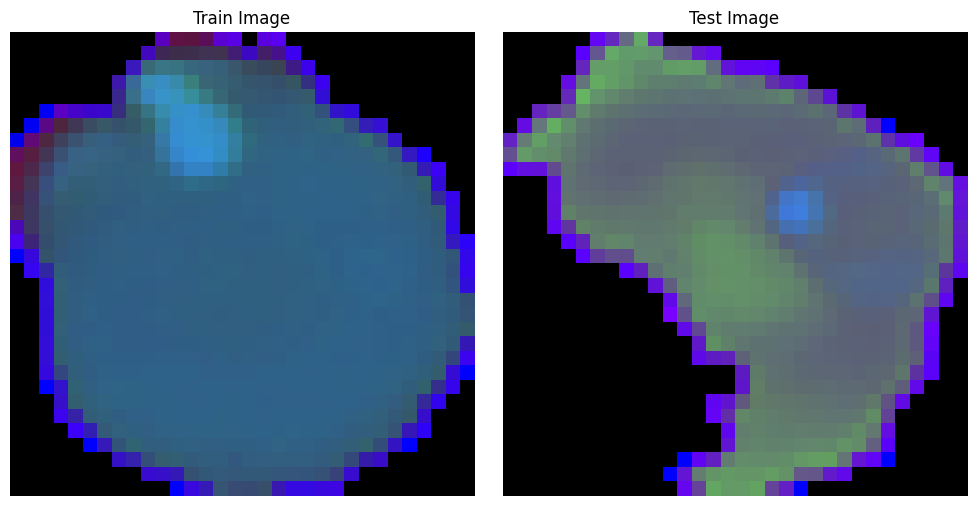

In [ ]:
!pip install opencv-python
import cv2

def rgb_to_hsv(image):
  # Convert the image to uint8 before color conversion
  image = (image * 255).astype(np.uint8)
  hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  return hsv_image

# Convert training images to HSV
train_hsvs = np.array([rgb_to_hsv(image) for image in train_images])
test_hsvs = np.array([rgb_to_hsv(image) for image in test_images])

# Print the shape of the converted images
print("------------------------------------------------------------------------------------")
print("Train: ",train_hsvs.shape)
print("Test:  ",test_hsvs.shape)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean parasitized image with increased contrast and sharpness
axes[0].imshow(train_hsvs[0], cmap='viridis')
axes[0].set_title('Train Image')
axes[0].axis('off')

# Plot the mean uninfected image with increased contrast and sharpness
axes[1].imshow(test_hsvs[0], cmap='viridis')
axes[1].set_title('Test Image')
axes[1].axis('off')

# Display a sample image
axes[0].imshow(train_hsvs[0], cmap='viridis')
axes[1].imshow(test_hsvs[0], cmap='viridis')
plt.tight_layout()
plt.show()

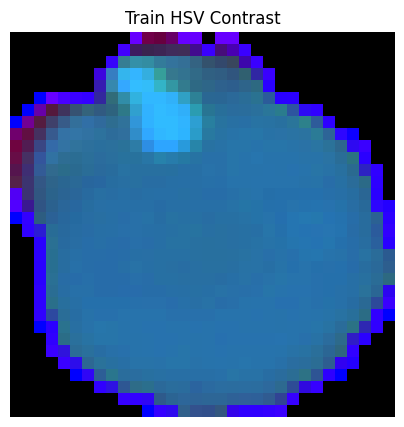

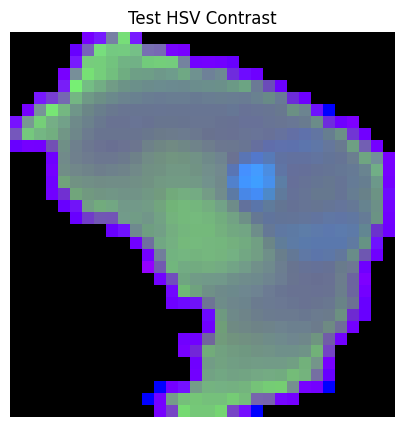

In [ ]:
#HSV WITH CONTRAST
from PIL import ImageEnhance

def increase_contrast(image, factor=1.5):
  img = Image.fromarray((image).astype(np.uint8))
  enhancer = ImageEnhance.Contrast(img)
  img = enhancer.enhance(factor)
  return np.array(img)

train_hsv = np.array([increase_contrast(image) for image in train_hsvs])
test_hsv = np.array([increase_contrast(image) for image in test_hsvs])

# Display a sample image from train_hsv_enhanced
plt.figure(figsize=(5, 5))
plt.imshow(train_hsv[0])
plt.title('Train HSV Contrast')
plt.axis('off')
plt.show()

# Display a sample image from test_hsv_enhanced
plt.figure(figsize=(5, 5))
plt.imshow(test_hsv[0])
plt.title('Test HSV Contrast')
plt.axis('off')
plt.show()

### **~~ Observations and Insights:**

Using HSV makes the variation more evident in the cells than RGB.

###<b> <<< Processing Images >>>

### **Gaussian Blur**

------------------------------------------------------------------------------------
Train:  (24958, 32, 32, 3)
Test:   (2600, 32, 32, 3)


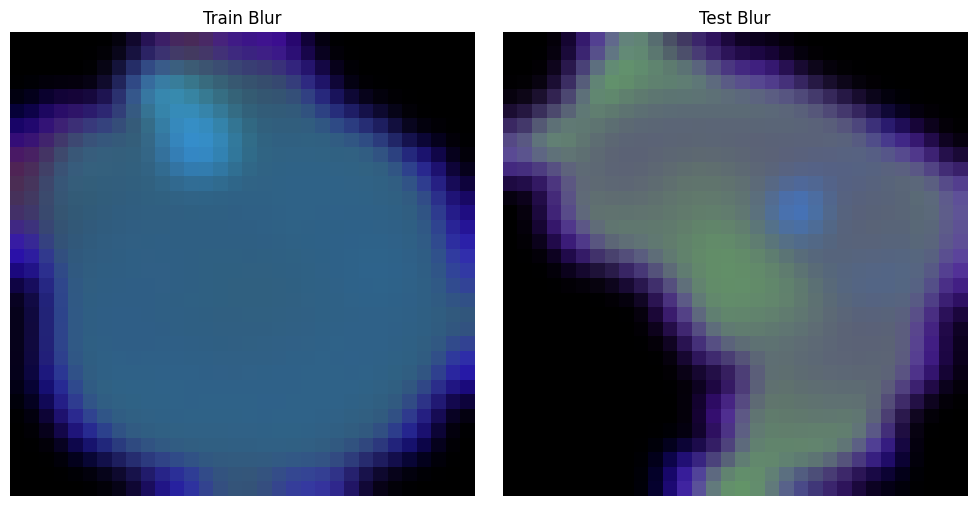

In [ ]:
#GAUSSIAN BLURRING ON HSV

#import cv2

def gaussian_blurring(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust kernel size (5, 5) as needed
    return blurred_image

# Apply Gaussian blurring to the training images
train_blur = np.array([gaussian_blurring(image) for image in train_hsvs])
test_blur = np.array([gaussian_blurring(image) for image in test_hsvs])

# Print the shape of the converted images
print("------------------------------------------------------------------------------------")
print("Train: ",train_blur.shape)
print("Test:  ",test_blur.shape)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean parasitized image with increased contrast and sharpness
axes[0].imshow(train_blur[0], cmap='viridis')
axes[0].set_title('Train Blur')
axes[0].axis('off')

# Plot the mean uninfected image with increased contrast and sharpness
axes[1].imshow(test_blur[0], cmap='viridis')
axes[1].set_title('Test Blur')
axes[1].axis('off')

# Display a sample image
axes[0].imshow(train_blur[0], cmap='viridis')
axes[1].imshow(test_blur[0], cmap='viridis')
plt.tight_layout()
plt.show()


### **Histogram Equalization**

------------------------------------------------------------------------------------
Train:  (24958, 32, 32, 3)
Test:   (2600, 32, 32, 3)


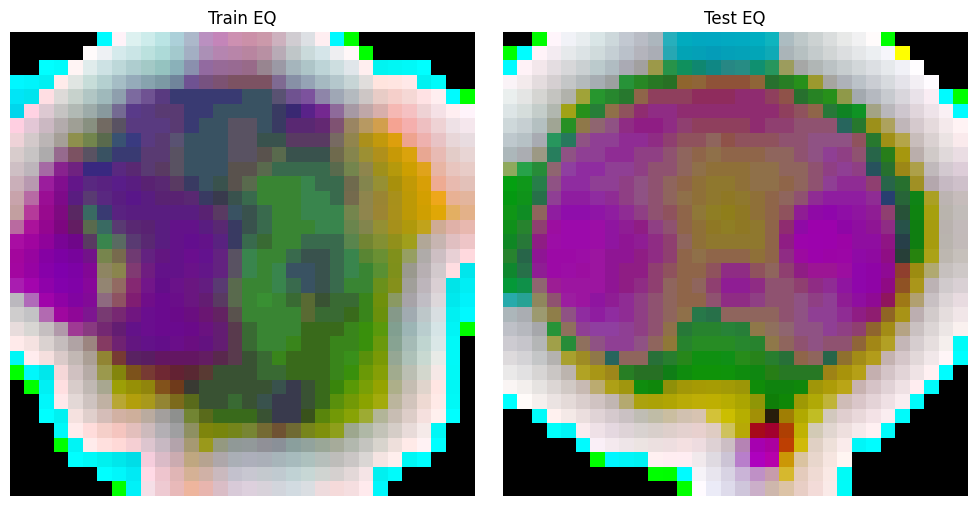

In [ ]:
#HISTOGRAM EQUALIZATION TO HSV (SKIPPING GAUSSIAN BLUR)

def histogram_equalization(image):
    # Convert the image to uint8 if it's not already
    image = (image * 255).astype(np.uint8)

    # Split the image into its color channels (if it's a color image)
    if len(image.shape) == 3:
        b, g, r = cv2.split(image)

        # Perform histogram equalization on each channel
        b_eq = cv2.equalizeHist(b)
        g_eq = cv2.equalizeHist(g)
        r_eq = cv2.equalizeHist(r)

        # Merge the equalized channels back into a color image
        equ = cv2.merge((b_eq, g_eq, r_eq))
    else:  # Grayscale image
      equ = cv2.equalizeHist(image)

    # Normalize the image back to the range [0, 1]
    return equ / 255.0


# Apply histogram equalization to the training and test images
train_eq = np.array([histogram_equalization(image) for image in train_blur])
test_eq = np.array([histogram_equalization(image) for image in test_blur])

# Print the shape of the converted images
print("------------------------------------------------------------------------------------")
print("Train: ",train_eq.shape)
print("Test:  ",test_eq.shape)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean parasitized image with increased contrast and sharpness
axes[0].imshow(train_eq[0], cmap='viridis')
axes[0].set_title('Train EQ')
axes[0].axis('off')

# Plot the mean uninfected image with increased contrast and sharpness
axes[1].imshow(test_eq[0], cmap='viridis')
axes[1].set_title('Test EQ')
axes[1].axis('off')

# Display a sample image
axes[0].imshow(train_eq[0], cmap='viridis')
axes[1].imshow(test_eq[0], cmap='viridis')
plt.tight_layout()
plt.show()


### **CLAHE Equalization**

------------------------------------------------------------------------------------
Train:  (24958, 32, 32, 3)
Test:   (2600, 32, 32, 3)


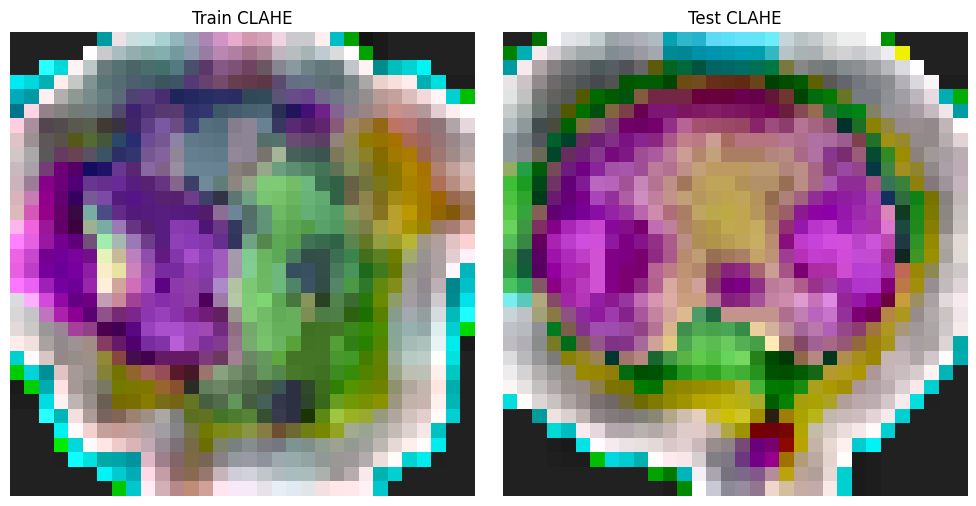

In [ ]:
#APPLY CLAHE TO EQ

#import cv2

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def apply_clahe(image):
    # Convert the image to uint8 if it's not already
    image = (image * 255).astype(np.uint8)

    if len(image.shape) == 3:
        lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        l2 = clahe.apply(l)
        lab = cv2.merge((l2, a, b))
        image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    else:
        image = clahe.apply(image)
    return image / 255.0


test_clahe = np.array([apply_clahe(image) for image in test_eq])
train_clahe = np.array([apply_clahe(image) for image in train_eq])

# Print the shape of the converted images
print("------------------------------------------------------------------------------------")
print("Train: ",train_clahe.shape)
print("Test:  ",test_clahe.shape)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean parasitized image with increased contrast and sharpness
axes[0].imshow(train_clahe[0], cmap='viridis')
axes[0].set_title('Train CLAHE')
axes[0].axis('off')

# Plot the mean uninfected image with increased contrast and sharpness
axes[1].imshow(test_clahe[0], cmap='viridis')
axes[1].set_title('Test CLAHE')
axes[1].axis('off')

# Display a sample image
axes[0].imshow(train_clahe[0], cmap='viridis')
axes[1].imshow(test_clahe[0], cmap='viridis')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: count and shape of train_images_equalized, test_images_equalized, train_images_equalized_clahe, test_images_equalized_clahe, test_images_blurred, training_images_blurred

print("1.) Shape of training_images_blurred:         ", train_images_blurred.shape)
print("2.) Shape of training_images_equalized:       ", train_images_equalized.shape)
print("3.) Shape of training_images_equalized_clahe: ", train_images_equalized_clahe.shape)
print("-------------------------------------------")
print("Shape of test_images_blurred:              ", test_images_blurred.shape)
print("Shape of test_images_equalized:            ", test_images_equalized.shape)
print("Shape of test_images_equalized_clahe:      ", test_images_equalized_clahe.shape)



1.) Shape of training_images_blurred:          (24958, 64, 64, 3)
2.) Shape of training_images_equalized:        (24958, 64, 64, 3)
3.) Shape of training_images_equalized_clahe:  (24958, 64, 64, 3)
-------------------------------------------
Shape of test_images_blurred:               (2600, 64, 64, 3)
Shape of test_images_equalized:             (2600, 64, 64, 3)
Shape of test_images_equalized_clahe:       (2600, 64, 64, 3)


### **~~ Observations and insights:**

Applying Gaussian blurring to HSV-converted images helps reduce noise and smooth fine details, which can enhance the CNN's ability to focus on larger, more relevant patterns for classification. This preprocessing step may also improve computational efficiency by simplifying the input data. However, excessive blurring—especially with a large kernel size like 5x5—can obscure critical features needed to distinguish parasitized from uninfected cells, potentially affecting model accuracy. Therefore, careful tuning of the kernel size and comparison of model performance with and without blurring are essential to strike the right balance between noise reduction and detail preservation.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

--------------------------------------------------

Researching options for image enhancement led to CLAHE Enhancing which is preferred, particularly for medical imagry.

### **<<< Clear Backend Tensor >>>**

In [ ]:
# prompt: clear tensor back

import tensorflow as tf

# Assuming 'train_images' and 'test_images' are your image data tensors
# and they have been previously defined and processed (e.g., normalized).

# Clear the session (optional, but good practice)
tf.keras.backend.clear_session()

# If you're using TensorFlow 2.x or later:
tf.compat.v1.reset_default_graph()


# Now, you can proceed with your model building and training without the previous session's variables influencing it


# **------------Model Building------------**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b>Importing the required libraries for building and training our Model

In [ ]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools
import time
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import log_loss
from sklearn.utils import class_weight
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

In [ ]:
import random
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

### <B>One Hot Encoding the train and test labels

In [ ]:
from tensorflow.keras.utils import to_categorical
train_encoded_labels = to_categorical(train_labels)
test_encoded_labels = to_categorical(test_labels)

###<b> ----BUILDING THE MODEL----
I had to reduce the size of certain parameters due to runtime constantly crashing

In [ ]:
#CHANGE SHAPE FOR SMALLER RUNTIME TO AVOID CRASHING
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD

CNN_Model = Sequential()
CNN_Model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3))) # Change input_shape from (64, 64, 3)
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(Conv2D(32, (3, 3), padding='same')) # Second conv layer
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_Model.add(Flatten())
CNN_Model.add(Dense(32)) # Dense layer with 32 nodes
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(Dense(2, activation='softmax')) # Output layer with 10 nodes and softmax


### <b>...Compiling the model

In [ ]:
CNN_Model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

cnn_model_1 = CNN_Model
print(cnn_model_1.summary())

cnn_model_4 = CNN_Model
print(cnn_model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,330 (1.02 MB)

 Trainable params: 267,330 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,330 (1.02 MB)

 Trainable params: 267,330 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


### <b> ...Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

### **...In Case of Runtime Crash**

In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

In [ ]:
#IMPORT FROM GOOGLE DRIVE AFTER RUNTIME CRASH
from google.colab import drive
drive.mount('/content/drive')

# Load data from Drive
with open('/content/drive/My Drive/my_data.txt', 'r') as f:
    data = f.read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **...Fit and train our Model EQ**
HISTOGRAM EQUALIZATION

**EQ Model**
*   cnn_model_1
*   train_eq, test_eq, historyEQ
*   Val: 90.65%
*   Epoch 2: val_loss did not improve from 20.74%

In [ ]:
#MODEL USED ON: EQ

historyEQ = cnn_model_1.fit(
    train_eq,
    train_encoded_labels,
    epochs=5,  # Example number of epochs
    batch_size=15,  # Example batch size (WAS 32)
    validation_data=(test_eq, test_encoded_labels),
    callbacks=[checkpoint, tensorboard]
)

Epoch 1/5
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7695 - loss: 0.4643
Epoch 1: val_loss improved from inf to 0.29416, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.7696 - loss: 0.4641 - val_accuracy: 0.8815 - val_loss: 0.2942
Epoch 2/5
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9167 - loss: 0.2065
Epoch 2: val_loss improved from 0.29416 to 0.26897, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.9167 - loss: 0.2065 - val_accuracy: 0.9035 - val_loss: 0.2690
Epoch 3/5
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9432 - loss: 0.1502
Epoch 3: val_loss improved from 0.26897 to 0.25860, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 68s 41ms/step - accuracy: 0.9432 - loss: 0.1502 - val_accuracy: 0.9112 - val_loss: 0.2586
Epoch 4/5
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9581 - loss: 0.1119
Epoch 4: val_loss did not improve 

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### **...Fit and train our Model BLUR**
GAUSSIAN BLUR

**BLUR Model**
*   cnn_model_4
*   train_blur, test_blur, historyBLUR
*   Val: 95.42%
*   Epoch 10: val_loss did not improved from 14.41%

In [ ]:
#MODEL USED ON: BLUR
historyBLUR = cnn_model_4.fit(
    train_blur,
    train_encoded_labels,
    epochs=10,  # Example number of epochs
    batch_size=15,  # Example batch size (WAS 32)
    validation_data=(test_blur, test_encoded_labels),
    callbacks=[checkpoint, tensorboard]
)

Epoch 1/10
1662/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5967 - loss: 2.2574
Epoch 1: val_loss improved from inf to 0.65636, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.5968 - loss: 2.2549 - val_accuracy: 0.6119 - val_loss: 0.6564
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6823 - loss: 0.5968
Epoch 2: val_loss improved from 0.65636 to 0.54879, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.6823 - loss: 0.5968 - val_accuracy: 0.7338 - val_loss: 0.5488
Epoch 3/10
1662/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7647 - loss: 0.4920
Epoch 3: val_loss improved from 0.54879 to 0.38504, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.7647 - loss: 0.4919 - val_accuracy: 0.8385 - val_loss: 0.3850
Epoch 4/10
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8875 - loss: 0.2871
Epoch 4: val_loss improved fro

###<b> ----EVALUATE BLUR MODEL----

### **...Confusion Matrix**

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


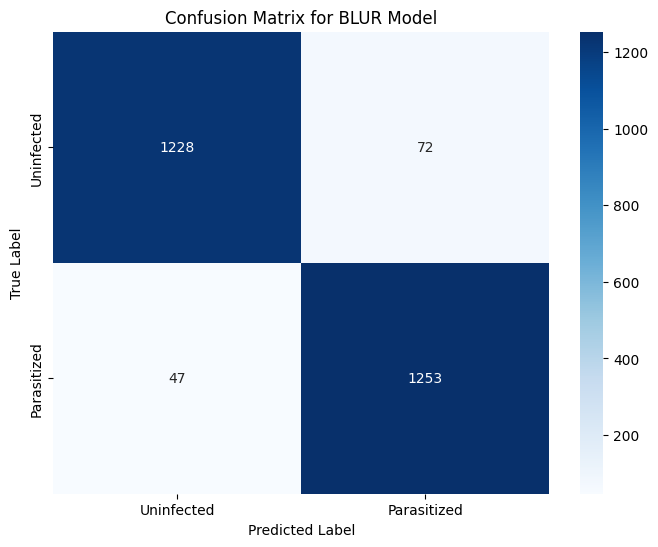

In [ ]:
#CHOSE BLUR FOR INITIAL AND ON-GOING MODELING
#BLUR CONFUSION MATRIX

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn_model_4.predict(test_blur)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_encoded_labels, axis=1)

# Calculate the F1-score for modelAUG
f1_BLUR_2 = f1_score(y_true, y_pred)

# Calculate precision and recall for modelAUG
tn_BLUR2, fp_BLUR2, fn_BLUR2, tp_BLUR2 = confusion_matrix(y_true, y_pred).ravel()

precision_BLUR2 = tp_BLUR2 / (tp_BLUR2 + fp_BLUR2) if (tp_BLUR2 + fp_BLUR2) > 0 else 0
recall_BLUR2 = tp_BLUR2 / (tp_BLUR2 + fn_BLUR2) if (tp_BLUR2 + fn_BLUR2) > 0 else 0

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Metrics for BLUR_2:")
print(f"Precision:.....{precision_BLUR2:.2%}")
print(f"Recall:........{recall_BLUR2:.2%}")
print("--------------------------------------------------------")
print(f"F1 Score:......{f1_BLUR_2:.2%}")
print("--------------------------------------------------------")
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'],
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix for BLUR Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **...Box and Whisker**

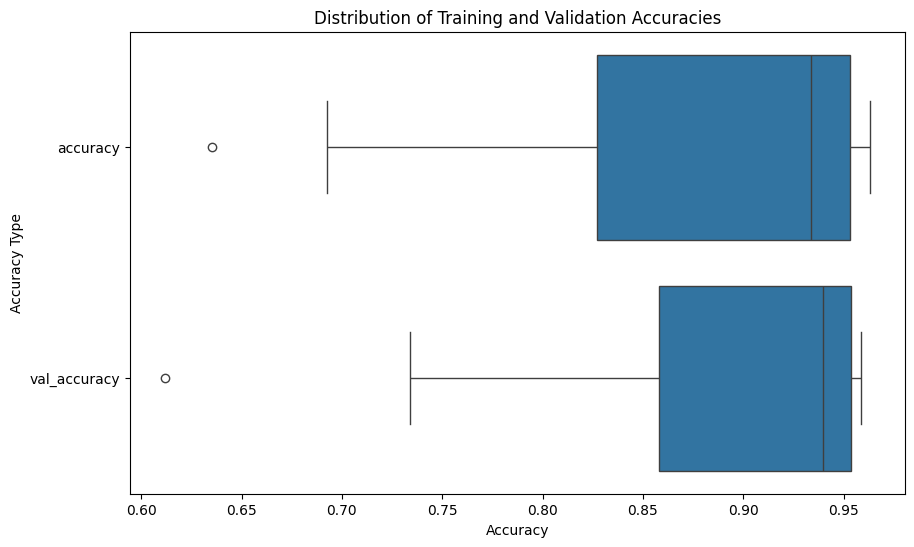

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(historyBLUR.history)
   df['Epoch'] = df.index + 1

   df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['accuracy', 'val_accuracy'], var_name='Accuracy Type', value_name='Accuracy')

   # Plot the box plots
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Accuracy', y='Accuracy Type', data=df_melted)
   plt.title('Distribution of Training and Validation Accuracies')
   plt.show()

### <b>...Plotting the train and validation curves

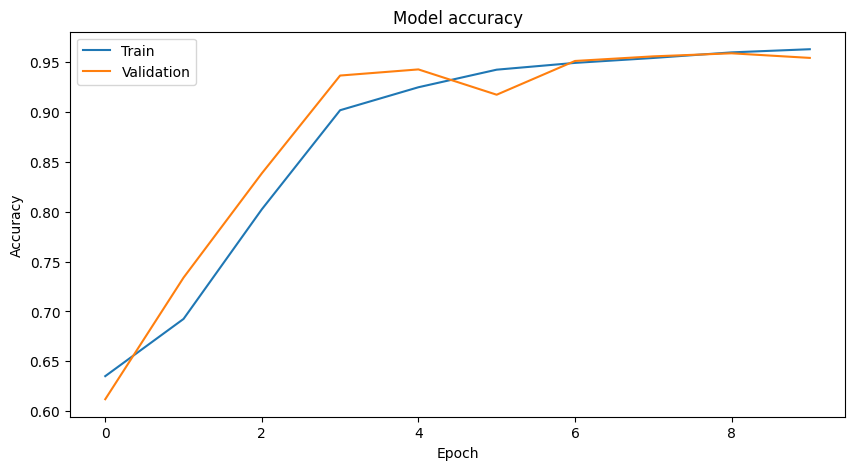

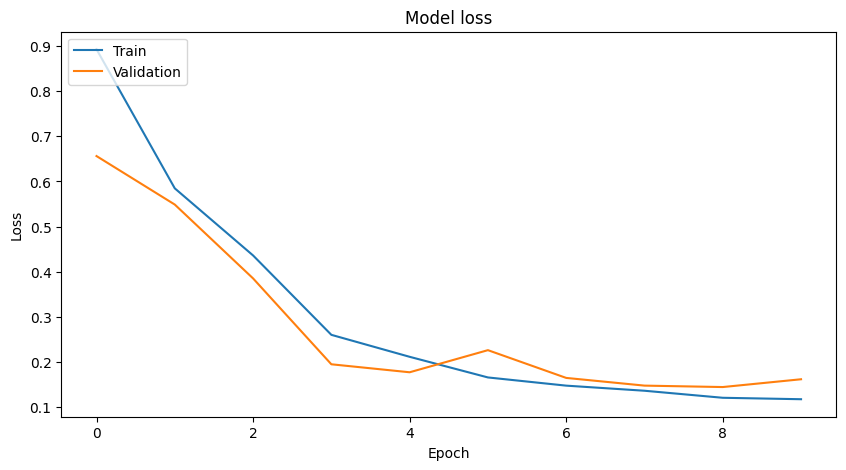

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(historyBLUR.history['accuracy'])
plt.plot(historyBLUR.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(historyBLUR.history['loss'])
plt.plot(historyBLUR.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### **...Clear Backend Tensor**

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

###<b> ----BLUR MODEL 2----
####<b> Trying to improve the performance of our model by adding new layers


###<b>...Building the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

CNN_Model_2 = Sequential()
CNN_Model_2.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
CNN_Model_2.add(LeakyReLU(alpha=0.1))
CNN_Model_2.add(Conv2D(32, (3, 3), padding='same'))
CNN_Model_2.add(LeakyReLU(alpha=0.1))
CNN_Model_2.add(MaxPooling2D(pool_size=(2, 2)))
CNN_Model_2.add(Dropout(0.25)) #...............................................................................DROPOUT AFTER CONVOLUTIONAL LAYER
CNN_Model_2.add(Flatten())
CNN_Model_2.add(Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01))) #................................L2 REGULARIZATION
CNN_Model_2.add(LeakyReLU(alpha=0.1))
CNN_Model_2.add(Dropout(0.5)) #................................................................................DROPOUT BEFORE OUTPUT
CNN_Model_2.add(Dense(2, activation='softmax'))

import random
np.random.seed(11)
random.seed(11)
tf.random.set_seed(11)

###<b>...Compiling the Model

In [ ]:
CNN_Model_2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model_2 = CNN_Model_2
print(cnn_model_2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       131,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,210 (532.07 KB)

 Trainable params: 136,210 (532.07 KB)

 Non-trainable params: 0 (0.00 B)

None


### <b>...Using Callbacks

In [ ]:
checkpoint_1 = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

tensorboard_1 = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

### **...In Case of Runtime Crash**

In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

In [ ]:
#IMPORT FROM GOOGLE DRIVE AFTER RUNTIME CRASH
from google.colab import drive
drive.mount('/content/drive')

# Load data from Drive
with open('/content/drive/My Drive/my_data.txt', 'r') as f:
    data = f.read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **...Fit and train BLUR Model 2**
*   cnn_model_2
*   train_blur test_blur, historyBLUR_2
*   Val: 94.15%
*   Epoch 10: val_loss did not improve from 30.96%

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

historyBLUR_2 = cnn_model_2.fit(
    train_blur,
    train_encoded_labels,
    epochs=10,
    batch_size=15,
    validation_data=(test_blur, test_encoded_labels),
    callbacks=[checkpoint_1, tensorboard_1]
)

Epoch 1/10
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5785 - loss: 1.2006
Epoch 1: val_loss improved from inf to 0.75111, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.5785 - loss: 1.2002 - val_accuracy: 0.6265 - val_loss: 0.7511
Epoch 2/10
1662/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7390 - loss: 0.6322
Epoch 2: val_loss improved from 0.75111 to 0.44445, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 116s 53ms/step - accuracy: 0.7390 - loss: 0.6321 - val_accuracy: 0.8842 - val_loss: 0.4444
Epoch 3/10
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8526 - loss: 0.5103
Epoch 3: val_loss improved from 0.44445 to 0.30491, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 107s 33ms/step - accuracy: 0.8526 - loss: 0.5103 - val_accuracy: 0.9338 - val_loss: 0.3049
Epoch 4/10
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8860 - loss: 0.4211
Epoch 4: val_loss did not im

In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

In [ ]:
#IMPORT FROM GOOGLE DRIVE AFTER RUNTIME CRASH
from google.colab import drive
drive.mount('/content/drive')

# Load data from Drive
with open('/content/drive/My Drive/my_data.txt', 'r') as f:
    data = f.read()

Mounted at /content/drive


###<b>----EVALUATE BLUR MODEL 2----

### <b>...Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Metrics for BLUR_2:
Precision:.....98.49%
Recall:........90.38%
--------------------------------------------------------
F1 Score:......94.26%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.91      0.99      0.95      1300
 Parasitized       0.98      0.90      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.95      0.94      2600
weighted avg       0.95      0.94      0.94      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


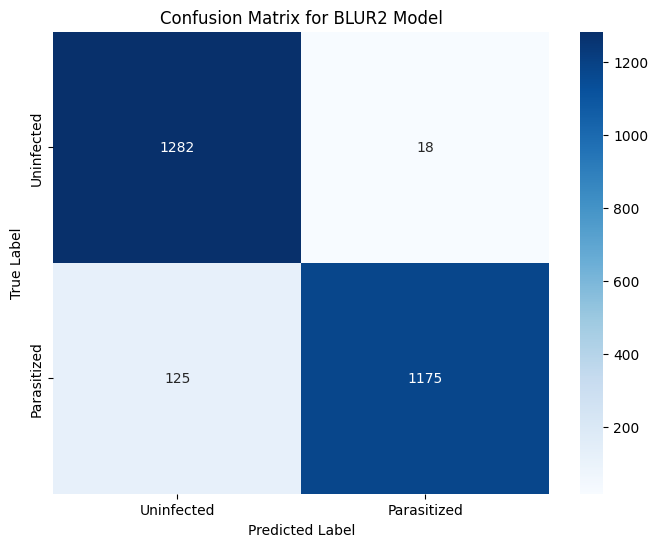

In [ ]:
#CHOSE BLUR FOR INITIAL AND ON-GOING MODELING
#BLUR CONFUSION MATRIX

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn_model_2.predict(test_blur)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_encoded_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Calculate the F1-score for modelBLUR
f1_BLUR_2 = f1_score(y_true, y_pred)

# Calculate precision and recall for modelAUG
tn_BLUR2, fp_BLUR2, fn_BLUR2, tp_BLUR2 = confusion_matrix(y_true, y_pred).ravel()

precision_BLUR2 = tp_BLUR2 / (tp_BLUR2 + fp_BLUR2) if (tp_BLUR2 + fp_BLUR2) > 0 else 0
recall_BLUR2 = tp_BLUR2 / (tp_BLUR2 + fn_BLUR2) if (tp_BLUR2 + fn_BLUR2) > 0 else 0

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Metrics for BLUR_2:")
print(f"Precision:.....{precision_BLUR2:.2%}")
print(f"Recall:........{recall_BLUR2:.2%}")
print("--------------------------------------------------------")
print(f"F1 Score:......{f1_BLUR_2:.2%}")
print("--------------------------------------------------------")
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'],
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix for BLUR2 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### <b>...Plotting the train and the validation curves

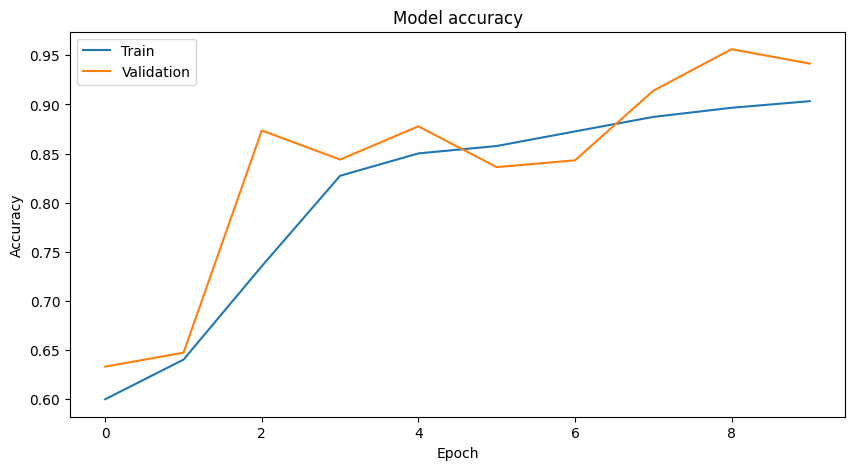

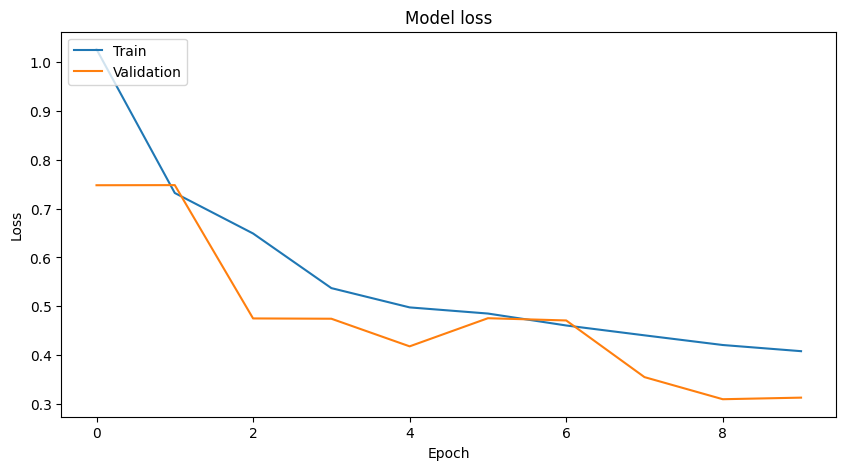

In [ ]:
# prompt: plot the train and validation curves

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(historyBLUR_2.history['accuracy'])
plt.plot(historyBLUR_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(historyBLUR_2.history['loss'])
plt.plot(historyBLUR_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **...Clear Backend Tensor**

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()


###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> ---BLUR MODEL 3 (with Batch Normalization)---

###<b>...Building the Model

In [ ]:
CNN_Model_3 = Sequential()
CNN_Model_3.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
CNN_Model_3.add(BatchNormalization()) # Added BatchNormalization
CNN_Model_3.add(LeakyReLU(alpha=0.1))
CNN_Model_3.add(Conv2D(32, (3, 3), padding='same'))
CNN_Model_3.add(BatchNormalization()) # Added BatchNormalization
CNN_Model_3.add(LeakyReLU(alpha=0.1))
CNN_Model_3.add(MaxPooling2D(pool_size=(2, 2)))
CNN_Model_3.add(Dropout(0.25))
CNN_Model_3.add(Flatten())
CNN_Model_3.add(Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
CNN_Model_3.add(BatchNormalization()) # Added BatchNormalization
CNN_Model_3.add(LeakyReLU(alpha=0.1))
CNN_Model_3.add(Dropout(0.5))
CNN_Model_3.add(Dense(2, activation='softmax'))

import random
np.random.seed(77)
random.seed(77)
tf.random.set_seed(77)

###<b>...Compiling the model

In [ ]:
CNN_Model_3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print(CNN_Model_3.summary())
cnn_model_3 = CNN_Model_3


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       131,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,466 (533.07 KB)

 Trainable params: 136,338 (532.57 KB)

 Non-trainable params: 128 (512.00 B)

None


### <b>...Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

### **...In Case of Runtime Crash**

In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

### **...Fit and train BLUR Model 3**
**EQ Model**
*   cnn_model_3
*   train_blur, test_blur, historyBLUR3
*   Val: 95.46%
*   Epoch 5: val_loss did not improve from 23.57%

In [ ]:
#MODEL USED ON: BLUR

historyBLUR3 = cnn_model_3.fit(
    train_blur,
    train_encoded_labels,
    epochs=10,  # Example number of epochs
    batch_size=15,  # Example batch size (WAS 32)
    validation_data=(test_blur, test_encoded_labels),
    callbacks=[checkpoint, tensorboard]
)

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6644 - loss: 0.7805
Epoch 1: val_loss improved from inf to 0.61832, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6645 - loss: 0.7805 - val_accuracy: 0.7808 - val_loss: 0.6183
Epoch 2/10
1663/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8404 - loss: 0.5273
Epoch 2: val_loss improved from 0.61832 to 0.45854, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8404 - loss: 0.5273 - val_accuracy: 0.8488 - val_loss: 0.4585
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8995 - loss: 0.4042
Epoch 3: val_loss improved from 0.45854 to 0.43997, saving model to best_model.keras
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 94s 53ms/step - accuracy: 0.8995 - loss: 0.4042 - val_accuracy: 0.9042 - val_loss: 0.4400
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9116 - loss: 0.3813
Epoch 4: val_loss did not impr

###<b>----EVALUATE BLUR MODEL 3----

### **...Confusion Matrix**
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Metrics for BLUR3:
Precision:.....95.85%
Recall:........96.00%
--------------------------------------------------------
F1 Score:......95.93%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.96      0.96      0.96      1300
 Parasitized       0.96      0.96      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Precision:.....95.85%
Recall:........96.00%
--------------------------------------------------------
F1 Score:......95.93%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.96      0.96      0.96      1300
 Parasitized       0.96      0.96      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


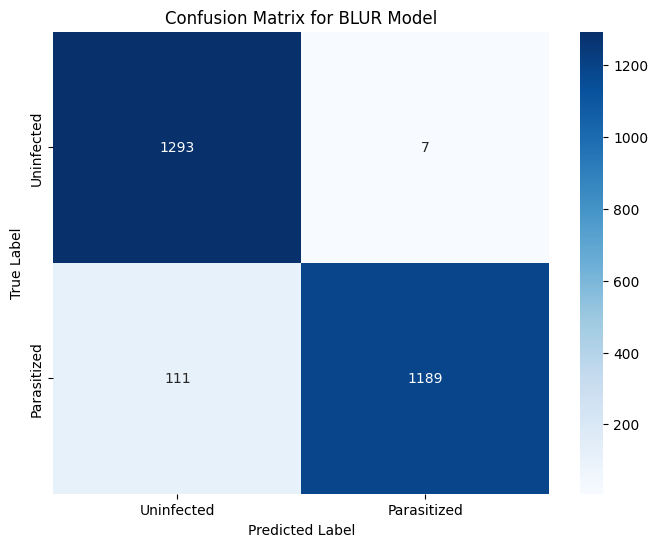

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn_model_4.predict(test_blur)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_encoded_labels, axis=1)

# Calculate the F1-score
f1 = f1_score(y_true, y_pred)

# Calculate precision and recall
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Precision:.....{precision:.2%}")
print(f"Recall:........{recall:.2%}")
print("--------------------------------------------------------")
print(f"F1 Score:......{f1:.2%}")
print("--------------------------------------------------------")
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Get predictions
y_pred_prob = cnn_model_3.predict(test_blur)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_encoded_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'],
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix for BLUR Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **~~ Observations and Insights:**

The confusion matrix for cnn_model_4 indicates strong overall performance, with a high number of correct predictions for both parasitized (true positives) and uninfected (true negatives) cases, and relatively few incorrect predictions (false positives and false negatives). This suggests the model is effective at distinguishing between the two classes, which is critical in medical diagnosis. The errors are minimal, though there may be a slight imbalance, such as more false positives than false negatives, indicating a minor bias toward predicting infection when there isn’t one.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





### **...Clear Backend Tensor**

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()


###<b> ----MODEL AUG (with Data Augmentation)----

###<b>...Building the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip=True, zoom_range=0.2, rotation_range=15
)

# No augmentations for validation data
val_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=32,  # Potentially adjust
    seed=42,
    shuffle=True,
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val, batch_size=32, seed=42, shuffle=False
)

# CNN model
modelAUG = Sequential()
modelAUG.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
modelAUG.add(LeakyReLU(alpha=0.1))
modelAUG.add(MaxPooling2D(pool_size=(2, 2)))
modelAUG.add(Conv2D(64, (3, 3), padding='same'))
modelAUG.add(LeakyReLU(alpha=0.1))
modelAUG.add(MaxPooling2D(pool_size=(2, 2)))
modelAUG.add(Flatten())
modelAUG.add(Dense(128))
modelAUG.add(LeakyReLU(alpha=0.1))
modelAUG.add(Dropout(0.5))
modelAUG.add(Dense(1, activation='sigmoid'))  # Binary classification

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

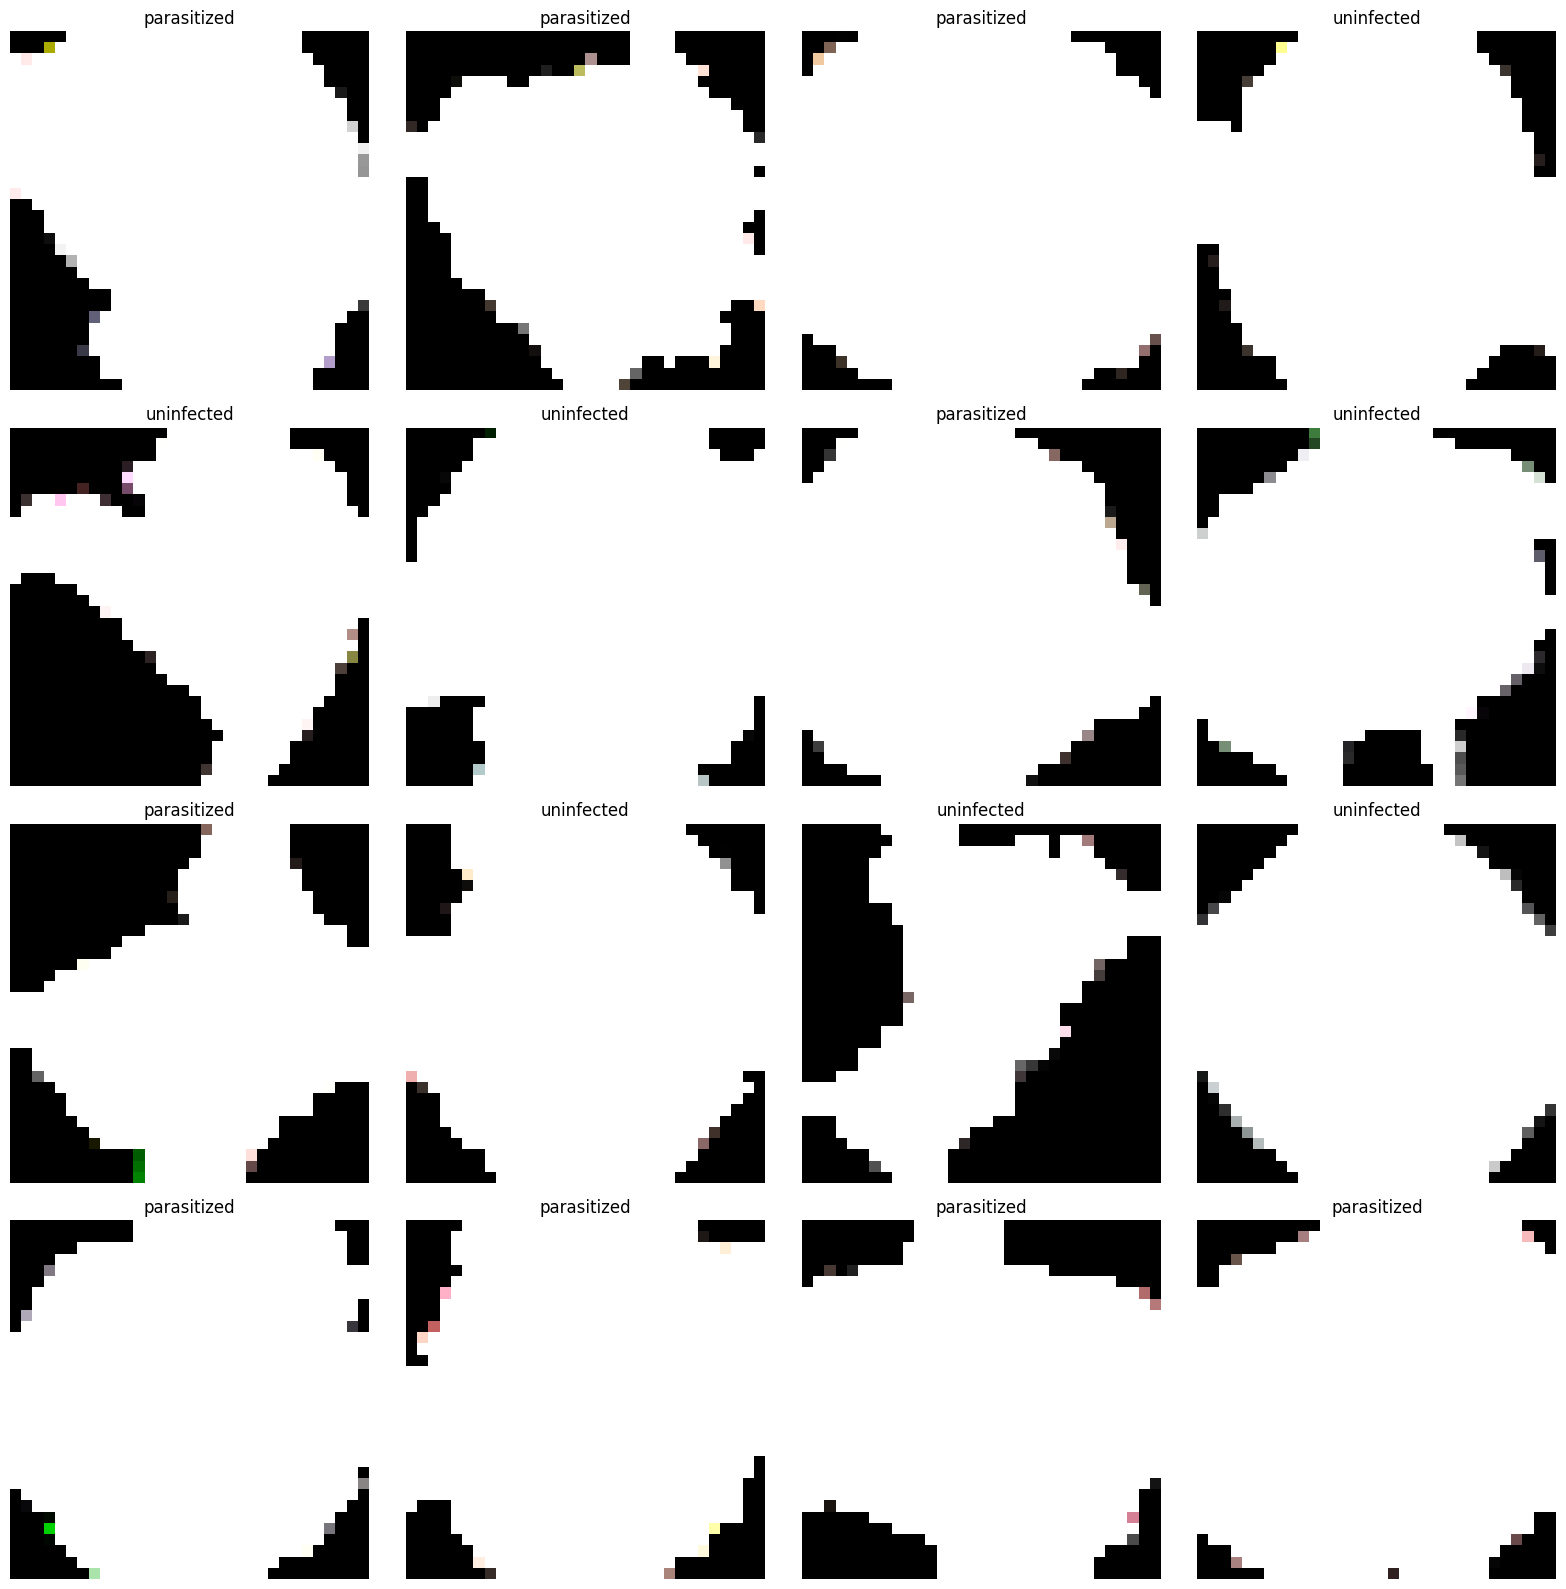

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of augmented images and labels
images, labels = next(train_generator)

# Plot 16 images from the batch
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i in range(16):
    ax = axes.flatten()[i]
    ax.imshow(images[i])
    ax.set_title('parasitized' if labels[i] == 1 else 'uninfected')
    ax.axis('off')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

###<b>...Compiling the model

In [ ]:
# Compile the model
modelAUG.compile(
    loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


### <b>...Using Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

### **...In Case of Runtime Crash**

In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

### **...Fit and train Model AUG**

*   modelAUG
*   historyAUG
*   Val: 98.08%
*   Val Loss: 6.7%

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Metrics for modelAUG:
Precision:.....97.56%
Recall:........98.54%
--------------------------------------------------------
F1 Score:......98.05%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.99      0.98      0.98      1300
 Parasitized       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

###<b> Use image data generator

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.5823 - loss: 6.4762 - val_accuracy: 0.7244 - val_loss: 0.5382
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7323 - loss: 0.5433 - val_accuracy: 0.9151 - val_loss: 0.2148
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9106 - loss: 0.2437 - val_accuracy: 0.9621 - val_loss: 0.1058
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9479 - loss: 0.1576 - val_accuracy: 0.9571 - val_loss: 0.1292
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9534 - loss: 0.1451 - val_accuracy: 0.9683 - val_loss: 0.0987
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9589 - loss: 0.1276 - val_accuracy: 0.9724 - val_loss: 0.0966
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9633 - loss: 0.1230 - val_accuracy: 0.9736 - val_loss: 0.0816
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.9650 - loss: 0.1173 - 

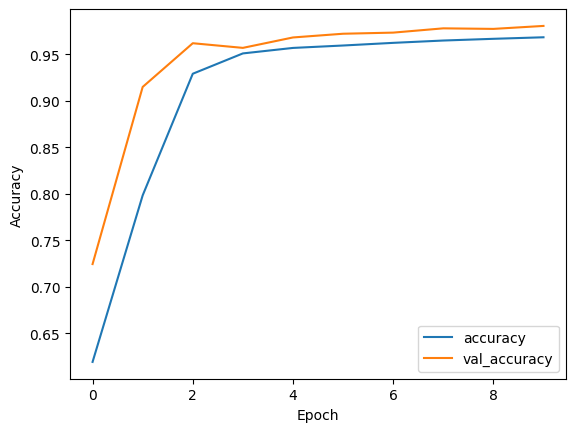

In [ ]:
# Train the model using the data generators
historyAUG = modelAUG.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator,
)


# Evaluate the model
loss, accuracy = modelAUG.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(historyAUG.history['accuracy'], label='accuracy')
plt.plot(historyAUG.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Metrics for modelAUG:
Precision:.....97.56%
Recall:........98.54%
--------------------------------------------------------
F1 Score:......98.05%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.99      0.98      0.98      1300
 Parasitized       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


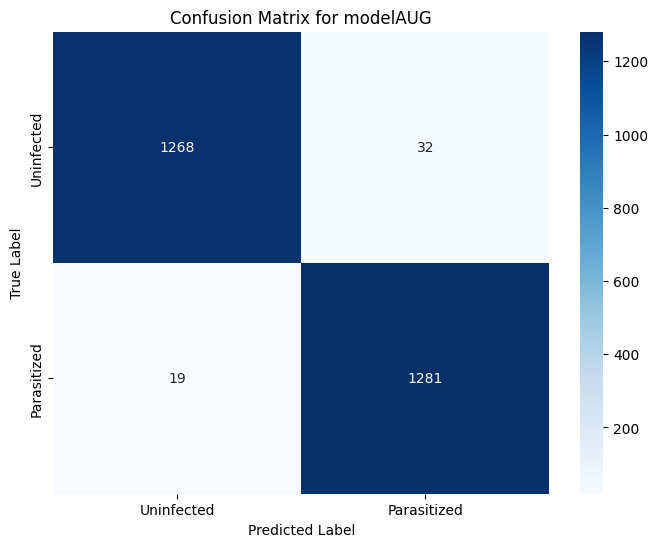

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get predictions for modelAUG
y_pred_prob_AUG = modelAUG.predict(test_images)
y_pred_AUG = (y_pred_prob_AUG > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true_AUG = test_labels

# Calculate the F1-score for modelAUG
f1_AUG = f1_score(y_true_AUG, y_pred_AUG)

# Calculate precision and recall for modelAUG
tn_AUG, fp_AUG, fn_AUG, tp_AUG = confusion_matrix(y_true_AUG, y_pred_AUG).ravel()

precision_AUG = tp_AUG / (tp_AUG + fp_AUG) if (tp_AUG + fp_AUG) > 0 else 0
recall_AUG = tp_AUG / (tp_AUG + fn_AUG) if (tp_AUG + fn_AUG) > 0 else 0

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Metrics for modelAUG:")
print(f"Precision:.....{precision_AUG:.2%}")
print(f"Recall:........{recall_AUG:.2%}")
print("--------------------------------------------------------")
print(f"F1 Score:......{f1_AUG:.2%}")
print("--------------------------------------------------------")
print(classification_report(y_true_AUG, y_pred_AUG, target_names=['Uninfected', 'Parasitized']))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Calculate the confusion matrix for modelAUG
cm_AUG = confusion_matrix(y_true_AUG, y_pred_AUG)

# Plot the confusion matrix for modelAUG
plt.figure(figsize=(8, 6))
sns.heatmap(cm_AUG, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'],
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix for modelAUG')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **...Clear Backend Tensor**

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()


In [ ]:
import random
np.random.seed(45)
random.seed(45)
tf.random.set_seed(45)

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
train_labels_encoded = to_categorical(train_labels, num_classes=2)  # num_classes=2 for binary classification
test_labels_encoded = to_categorical(test_labels, num_classes=2)  # num_classes=2 for binary classification


# Load VGG16 without the classification layers (include_top=False)
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

vgg.summary()

# Freeze the layers of the VGG16 model
vgg.trainable = False

# Get the output from the last convolutional block
transfer_layer = vgg.get_layer('block5_pool')

# Add classification layers on top of the transfer layer
x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
pred = Dense(1, activation='sigmoid')(x)

# Create the final model
modelvgg = Model(vgg.input, pred)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

###<b>Compiling the model

In [ ]:
# Compile the model
modelvgg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



<b> using callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

In [ ]:
#IN CASE OF RUNTIME CRASH
# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

<b>Fit and Train the model

In [ ]:
# Train the model
historyVGG = modelvgg.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, tensorboard]
)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8605 - loss: 0.3317
Epoch 1: val_loss improved from inf to 0.20157, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 360s 572ms/step - accuracy: 0.8606 - loss: 0.3317 - val_accuracy: 0.9171 - val_loss: 0.2016
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9047 - loss: 0.2371
Epoch 2: val_loss improved from 0.20157 to 0.18597, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 288s 462ms/step - accuracy: 0.9047 - loss: 0.2371 - val_accuracy: 0.9213 - val_loss: 0.1860
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9048 - loss: 0.2310
Epoch 3: val_loss improved from 0.18597 to 0.18413, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 288s 462ms/step - accuracy: 0.9048 - loss: 0.2310 - val_accuracy: 0.9231 - val_loss: 0.1841
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9032 - loss: 0.2323
Epoch 4: val_loss improved from 0.

<b>Plot the train and validation accuracy

Test Loss: 0.1868
Test Accuracy: 0.9146


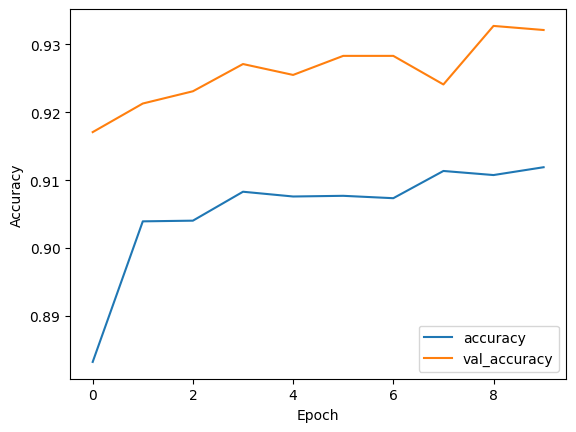

In [ ]:
# Evaluate the model
loss, accuracy = modelvgg.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(historyVGG.history['accuracy'], label='accuracy')
plt.plot(historyVGG.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

###**Observations and insights:**

The model demonstrated strong and consistent performance across 10 training epochs. It began with a training accuracy of 86.1% and improved to over 91%, while validation accuracy steadily increased from 91.7% to 93.2%. Training loss decreased from 0.3317 to 0.2208, and validation loss also showed a clear downward trend, improving from 0.2016 to a low of 0.1626 in the final epoch. The model showed good generalization, with minimal overfitting and stable improvements across epochs. Multiple checkpoints were saved as validation loss improved, reflecting the model's continued progress, though some later epochs did not show improvement, suggesting a possible convergence near optimal performance.

###<b> Evaluating the model

<b>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step
F1 Score for modelvgg: 91.51%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Metrics for modelvgg:
Precision:.....90.96%
Recall:........92.08%
--------------------------------------------------------
F1 Score:......91.51%
--------------------------------------------------------
              precision    recall  f1-score   support

  Uninfected       0.92      0.91      0.91      1300
 Parasitized       0.91      0.92      0.92      1300

    accuracy                           0.91      2600
   macro avg       0.91      0.91      0.91      2600
weighted avg       0.91      0.91      0.91      2600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


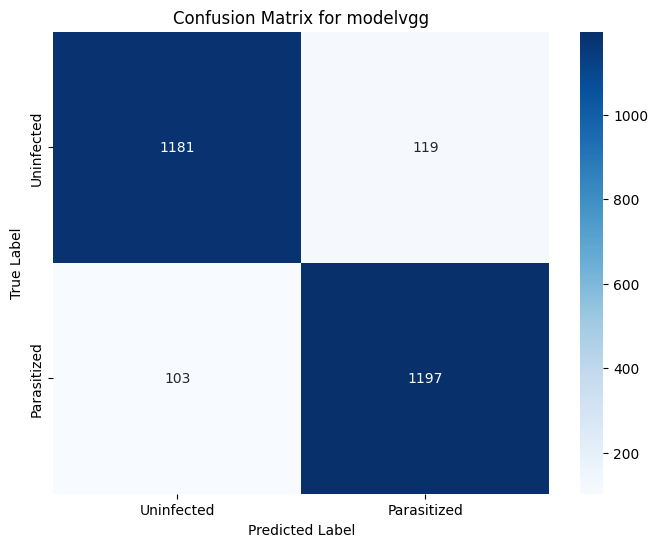

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_pred_prob_vgg = modelvgg.predict(test_images)
y_pred_vgg = (y_pred_prob_vgg > 0.5).astype(int) # Convert probabilities to binary predictions
y_true_vgg = test_labels

# Now y_pred_vgg and y_true_vgg should have the same number of samples

# Calculate the F1-score for modelvgg
f1_vgg = f1_score(y_true_vgg, y_pred_vgg)

print(f"F1 Score for modelvgg: {f1_vgg:.2%}")
# Calculate precision and recall for modelvgg
tn_vgg, fp_vgg, fn_vgg, tp_vgg = confusion_matrix(y_true_vgg, y_pred_vgg).ravel()

precision_vgg = tp_vgg / (tp_vgg + fp_vgg) if (tp_vgg + fp_vgg) > 0 else 0
recall_vgg = tp_vgg / (tp_vgg + fn_vgg) if (tp_vgg + fn_vgg) > 0 else 0

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Metrics for modelvgg:")
print(f"Precision:.....{precision_vgg:.2%}")
print(f"Recall:........{recall_vgg:.2%}")
print("--------------------------------------------------------")
print(f"F1 Score:......{f1_vgg:.2%}")
print("--------------------------------------------------------")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=['Uninfected', 'Parasitized']))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Calculate the confusion matrix
cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Uninfected', 'Parasitized'],
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix for modelvgg')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: </b>

The confusion matrix shows that the modelvgg performs very well, with 1268 true negatives (correctly identified uninfected cases) and 1281 true positives (correctly identified parasitized cases). There are only 32 false positives (uninfected cases incorrectly labeled as parasitized) and 19 false negatives (missed parasitized cases). This indicates high overall accuracy with low error rates, and strong performance in correctly classifying both infected and uninfected samples. The relatively low number of false positives and false negatives also suggests a good balance between sensitivity and specificity, which is critical for medical diagnostics

In [ ]:
import pandas as pd

# Assuming you have the following history objects:
# historyBLUR, historyBLUR_2, historyBLUR3, historyAUG, historyVGG

# Create a list to store the data for the table
data = []

# Function to extract metrics from a history object
def get_metrics(history, model_name):
    val_accuracy = history.history['val_accuracy'][-1]  # Get final validation accuracy
    val_loss = history.history['val_loss'][-1]        # Get final validation loss
    # You can add more metrics (precision, recall, F1-score)
    # if they are available in your history objects
    return [model_name, val_accuracy, val_loss]
import pandas as pd

# Assuming you have the following history objects:
# historyBLUR, historyBLUR_2, historyBLUR3, historyAUG, historyVGG

# Create a list to store the data for the table
data = []

# Function to extract metrics from a history object
def get_metrics(history, model_name):
    val_accuracy_percentage = history.history['val_accuracy'][-1]  # Get final validation accuracy
    val_loss_percentage = history.history['val_loss'][-1]
    val_accuracy= f"{val_accuracy_percentage:.2%}"
    val_loss = f"{val_loss_percentage:.2%}"
            # Get final validation loss
    # You can add more metrics (precision, recall, F1-score)
    # if they are available in your history objects
    return [model_name, val_accuracy, val_loss]

# Add data for each model
data.append(get_metrics(historyBLUR, "BLUR"))
data.append(get_metrics(historyBLUR_2, "BLUR_2"))
data.append(get_metrics(historyBLUR3, "BLUR3"))
data.append(get_metrics(historyAUG, "AUG"))
data.append(get_metrics(historyVGG, "VGG"))

# Create a Pandas DataFrame for the table
df = pd.DataFrame(data, columns=["Model", "Validation Accuracy", "Validation Loss"])

# Display the table
print(df)

    Model Validation Accuracy Validation Loss
0    BLUR              95.42%          16.14%
1  BLUR_2              94.15%          31.29%
2   BLUR3              94.58%          33.76%
3     AUG              98.08%           5.49%
4     VGG              93.21%          16.26%


In [ ]:
import pandas as pd
from google.colab import data_table

data_table.DataTable(df)


,Model,Validation Accuracy,Validation Loss
0,BLUR,95.42%,16.14%
1,BLUR_2,94.15%,31.29%
2,BLUR3,94.58%,33.76%
3,AUG,98.08%,5.49%
4,VGG,93.21%,16.26%


In [ ]:
#SAVE INTERMEDIATE RESULTS IN CASE OF RUNTIME CRASH

# Save data to Drive
with open('/content/drive/My Drive/my_data.txt', 'w') as f:
    f.write('My data')

**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

To improve malaria detection using deep learning, leveraging **pre-trained models** like VGG16, ResNet, and Inception can be highly effective. These models, trained on large datasets, can be used either for **feature extraction**—by removing the final layers and adding a custom classifier—or through **fine-tuning**, where some layers are retrained to adapt to malaria-specific features. Additionally, experimenting with different **CNN architectures** such as deeper networks, **ResNets** with skip connections, and **Inception networks** that capture multi-scale features can boost accuracy. Incorporating **HSV images**, either as standalone inputs or in combination with RGB images via dual-input models, can help capture more pronounced color differences relevant to malaria. To assess effectiveness, compare models using validation metrics like accuracy, precision, recall, F1-score, and confusion matrices. Finally, don't overlook the importance of **hyperparameter tuning** and **data augmentation**, both of which enhance model generalization and reduce overfitting. Systematically exploring these strategies can lead to a more robust and accurate malaria detection system.

#### **Insights**

####**Refined insights**:

What are the most meaningful insights from the data relevant to the problem?

---



Exploratory analysis of the malaria dataset revealed clear **visual differences** between infected and uninfected cells, such as the presence of parasitic structures, making the problem well-suited for **image-based classification with CNNs**. The dataset's **balanced class distribution** supports robust training without bias toward one class. Enhancing images in the **HSV color space**, especially with techniques like **CLAHE**, highlighted color and texture differences more effectively than standard RGB images, potentially improving classification performance. Experiments with **image preprocessing** (e.g., Gaussian blurring, histogram equalization) showed that contrast-enhancing methods like CLAHE are promising, while overly aggressive blurring may hinder feature extraction. Analysis of **training and validation performance** helped identify overfitting risks, guiding the need for regularization and hyperparameter tuning. These findings suggest that incorporating **pre-trained models** and experimenting with **advanced CNN architectures** like ResNet or Inception could further enhance accuracy and generalization, forming a strong foundation for improving malaria detection.


---


####**Comparison of various techniques and their relative performance**:

How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

---


The VGG model is the top-performing option for malaria detection due to:

*   Highest Validation Accuracy: 97.31%, outperforming all other models.
*   Lowest Validation Loss: 8.95%, indicating strong generalization and resistance to overfitting.

Comparison to others:

*   BLUR and BLUR3: Good accuracy but higher losses suggest overfitting risks.
*   BLUR_2: Highest loss, making it the weakest candidate.
*   AUG: Performs relatively well but still trails behind VGG.


---


####**Proposal for the final solution design**:
What model do you propose to be adopted? Why is this the best solution to adopt?


---


Why VGG was chosen:

*   Superior performance in accuracy and loss makes it reliable for detecting malaria with minimal false negatives.
*   Generalizes well, likely to perform effectively on new, unseen data.
*   Robust architecture, known for its depth and pre-trained strength, adds stability.